        Distance  Body Battery       Sleep     stress  Total Ascent  \
count  40.000000     40.000000   40.000000  40.000000     40.000000   
mean    8.868250     56.625000  424.075000  24.625000     53.075000   
std     7.216006     12.943046   39.636416  10.337106     55.001346   
min     1.120000     36.000000  300.000000  12.000000      0.000000   
25%     5.010000     46.750000  400.000000  17.750000      5.750000   
50%     6.670000     53.500000  423.500000  21.000000     36.000000   
75%    10.010000     64.250000  445.500000  30.500000    106.250000   
max    42.770000     84.000000  509.000000  52.000000    205.000000   

       Total Descent  Temperature     Avg Pace  
count      40.000000     40.00000    40.000000  
mean       52.200000     16.25250   386.900000  
std        61.719049      6.38307   157.284945  
min         0.000000      4.80000   283.000000  
25%         2.000000     11.67500   319.000000  
50%        22.500000     16.35000   340.000000  
75%       106.500

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


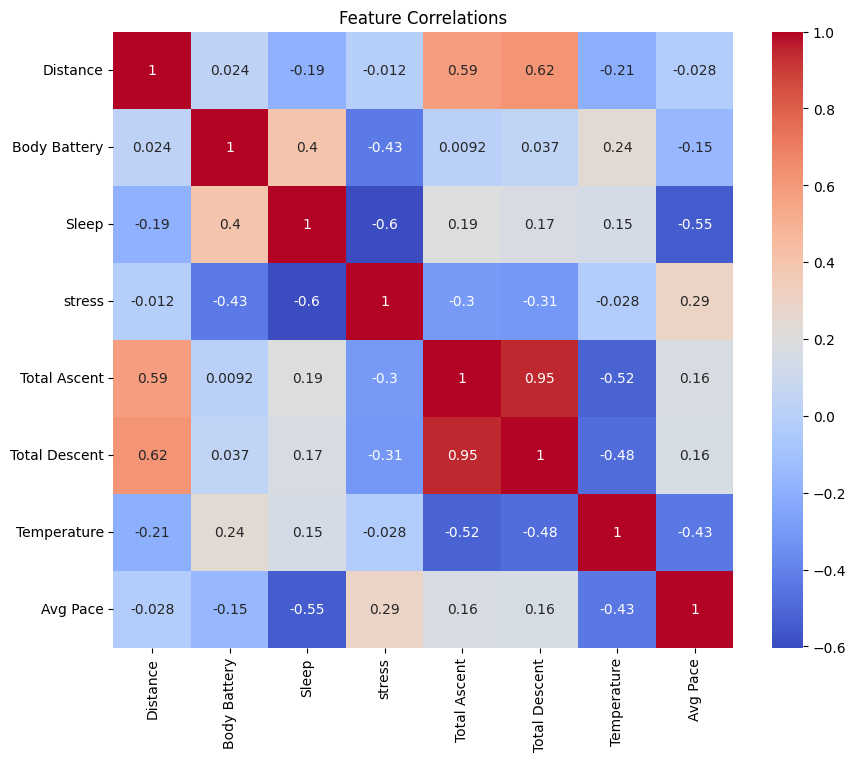

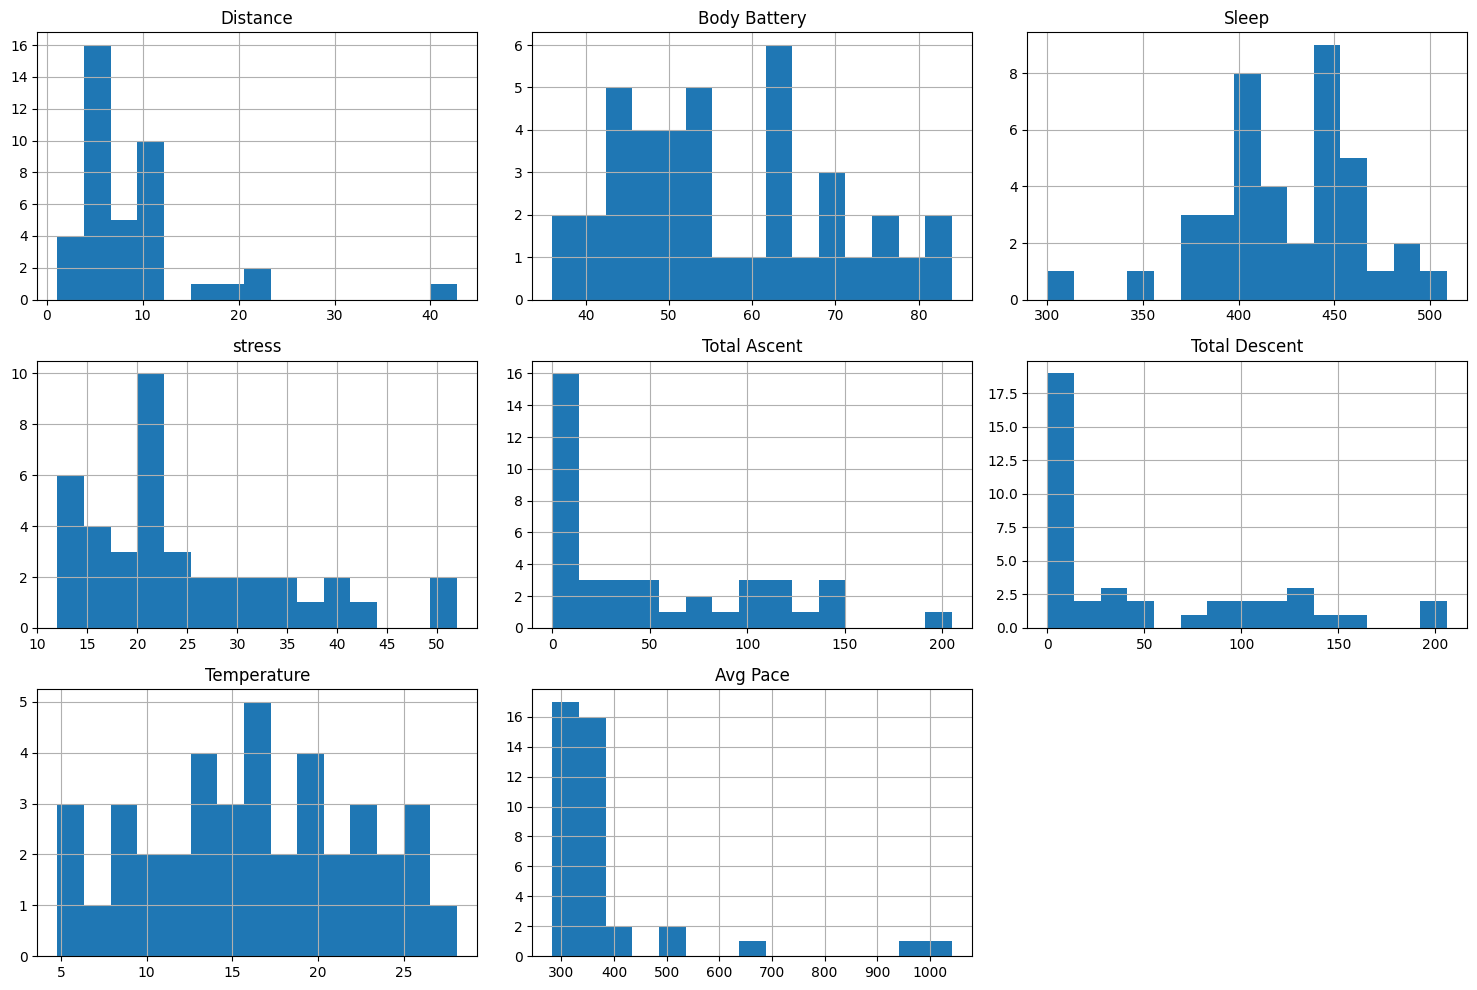

   Distance  Body Battery  Sleep  stress  Total Ascent  Total Descent  \
0      5.00            52    400      43            37             32   
1      5.01            62    430      20            22             20   
2      5.00            77    441      13            40             38   
3      5.01            84    486      14            49             48   
4      5.00            78    457      15            52             49   

   Temperature  Avg Pace  
0         25.5       319  
1         26.3       319  
2         22.7       343  
3         18.1       337  
4         11.6       359  
         Distance  Body Battery       Sleep      stress  Total Ascent  \
count  290.000000    290.000000  290.000000  290.000000    290.000000   
mean     8.541763     53.882047  402.764372   24.456595     50.695492   
std      7.599358     12.618685   45.621183   10.328866     49.776010   
min      0.963029     29.421631  263.054842   10.559257      0.000000   
25%      4.699908     43.945215  3

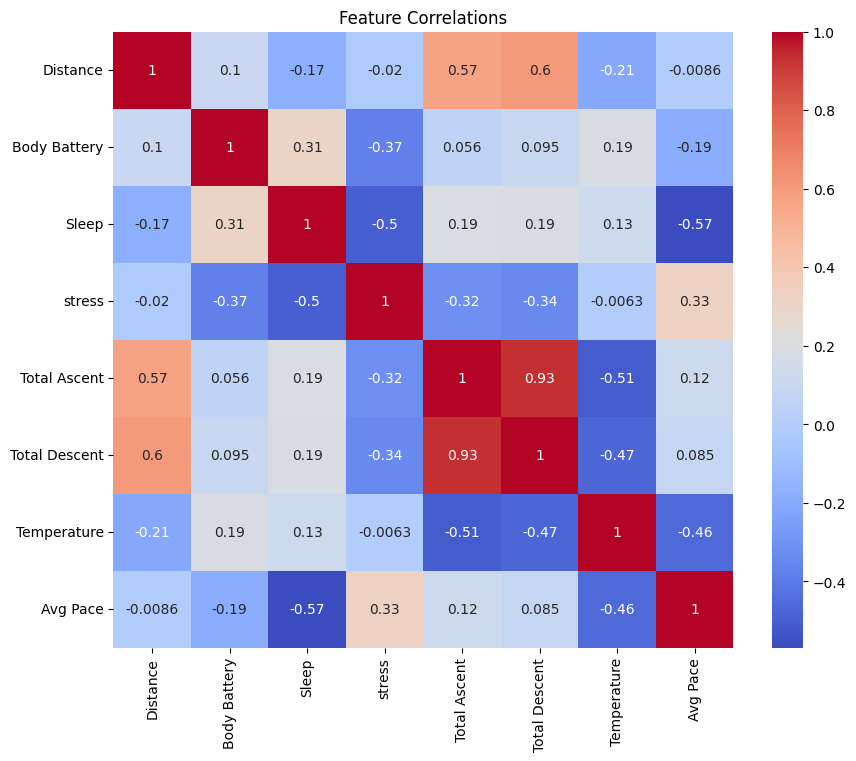

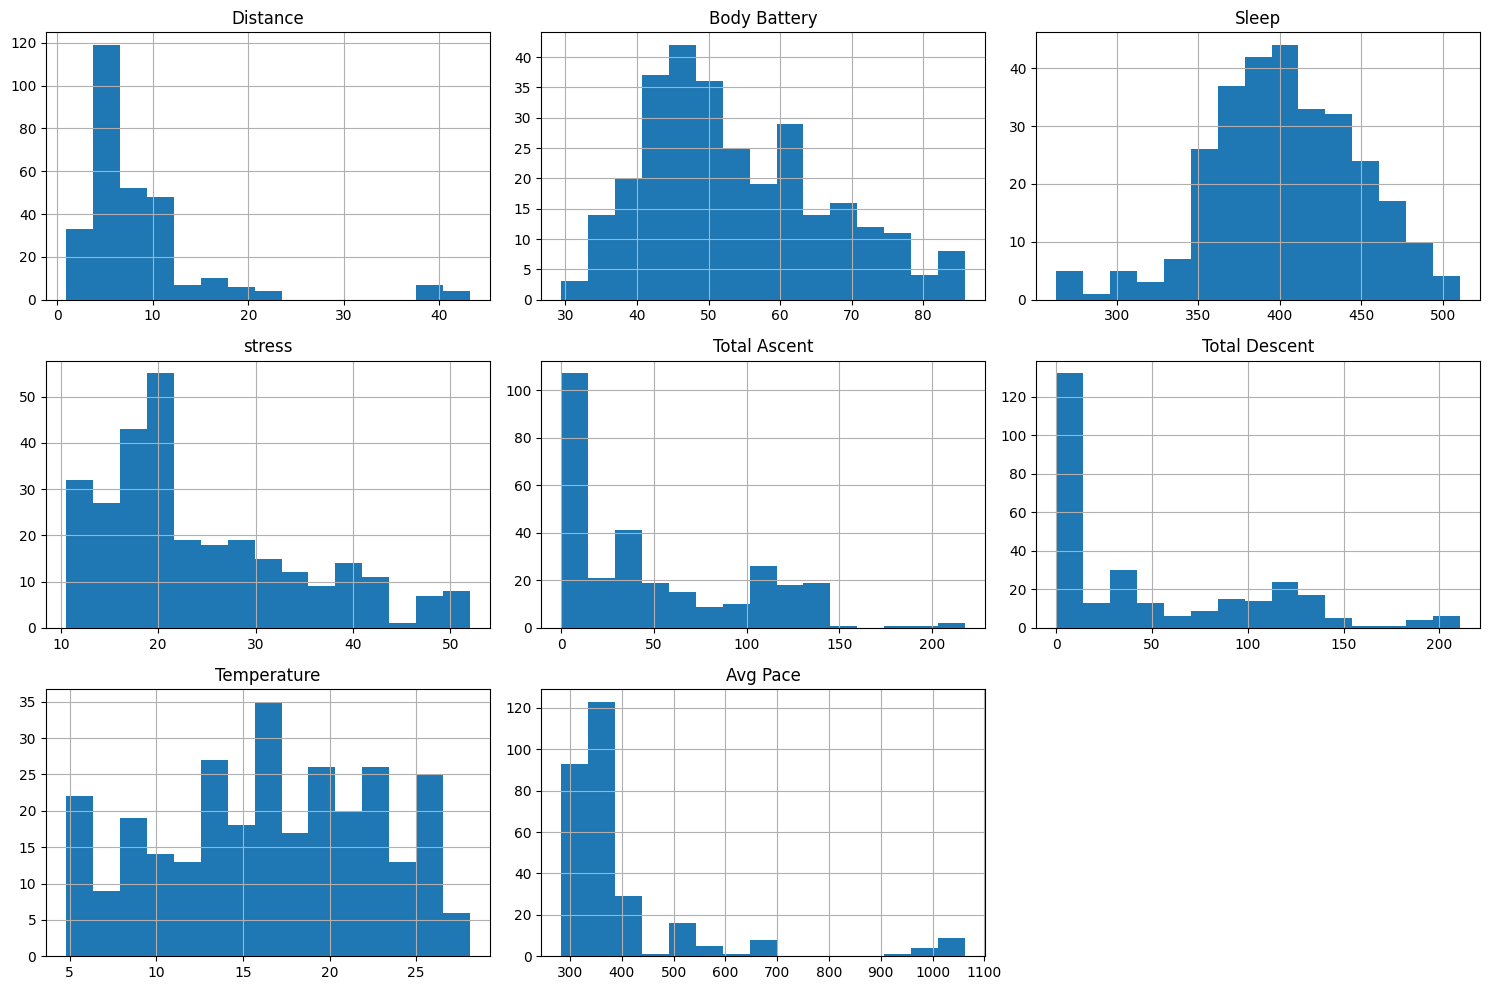

   Distance  Body Battery  Sleep  stress  Total Ascent  Total Descent  \
0      5.00          52.0  400.0    43.0          37.0           32.0   
1      5.01          62.0  430.0    20.0          22.0           20.0   
2      5.00          77.0  441.0    13.0          40.0           38.0   
3      5.01          84.0  486.0    14.0          49.0           48.0   
4      5.00          78.0  457.0    15.0          52.0           49.0   

   Temperature  Avg Pace  
0         25.5     319.0  
1         26.3     319.0  
2         22.7     343.0  
3         18.1     337.0  
4         11.6     359.0  
Epoch 50, Loss: 5111.5864
Epoch 100, Loss: 2809.7095
Epoch 150, Loss: 1899.0509
Epoch 200, Loss: 1406.2112
Epoch 250, Loss: 1086.7616
Epoch 300, Loss: 922.4668
Epoch 350, Loss: 825.9501
Epoch 400, Loss: 759.7280
Epoch 450, Loss: 712.6312
Epoch 500, Loss: 670.4771
Epoch 550, Loss: 602.9277
Epoch 600, Loss: 557.0634
Epoch 650, Loss: 524.5963
Epoch 700, Loss: 488.3611
Epoch 750, Loss: 441.3071
Epoch

In [6]:
from preprocessing import preprocess
from train import train_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import torch
import joblib

df = pd.read_csv("../data/Activities-6-2-2.csv")
X_train, X_test, y_train, y_test = preprocess(df)
model, mse, r2 = train_model(X_train, y_train, X_test, y_test)

print("MSE:", mse)
print("R2:", r2)

In [8]:
# Make sure model is in eval mode
model.eval()

# Prepare new input
X_new = np.array([[5, 50, 420, 30, 30.0, 35, 30]])
scaler = joblib.load("scaler.save")
X_new_scaled = scaler.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    y_pred = model(X_new_tensor).numpy().flatten()

print("Predicted:", y_pred)

Predicted: [317.75626]


In [9]:
from map import geocode_address
from geopy.geocoders import Nominatim

lon, lat = geocode_address("Bischofstraße 15, Aachen, Germany")

In [10]:
from dotenv import load_dotenv
import os

load_dotenv()  # load .env file

ORS_API_KEY = os.environ["ORS_API_KEY"]
print(ORS_API_KEY)

eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjEzNWMxYTFkMTA1YjRmMTM4NjVlNzM3OTZhOGQwMTgyIiwiaCI6Im11cm11cjY0In0=


In [12]:
from map import route_plan

coordinates, m = route_plan(ORS_API_KEY, lon, lat)
m

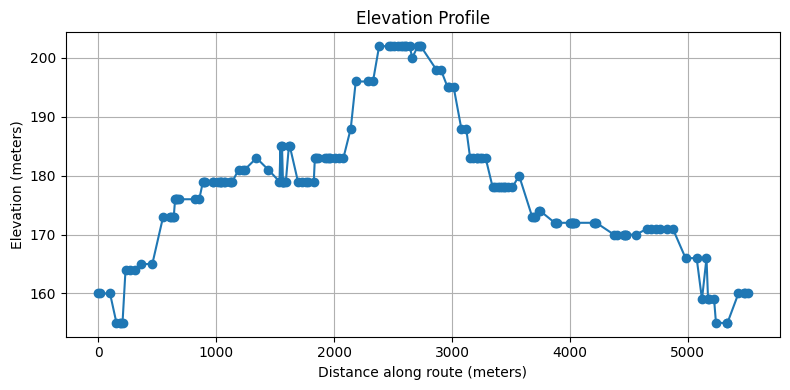

ValueError: too many values to unpack (expected 2)

In [7]:
from map import elevation
import matplotlib.pyplot as plt

elevations, distances = elevation(coordinates)
# Plot
plt.figure(figsize=(8, 4))
plt.plot(distances, elevations, marker="o")
plt.xlabel("Distance along route (meters)")
plt.ylabel("Elevation (meters)")
plt.title("Elevation Profile")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
from map import des_asc

total_ascent, total_descent = des_asc(elevations)
print("Total ascent:", total_ascent)
print("Total descent:", total_descent)

Total ascent: 87.0
Total descent: 87.0
